In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('data/processed/Vacancy_new.csv', index_col=0, parse_dates = [2, 3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700865 entries, 0 to 1700864
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   car                  object        
 1   park_time            datetime64[ns]
 2   reservation_time     datetime64[ns]
 3   time_to_reservation  float64       
 4   park_location_lat    float64       
 5   park_location_long   float64       
 6   leave_location_lat   float64       
 7   leave_location_long  float64       
 8   park_zone            int64         
 9   leave_zone           int64         
 10  park_fuel            int64         
 11  leave_fuel           int64         
 12  engine               object        
 13  moved                float64       
 14  prev_customer        object        
 15  next_customer        object        
dtypes: datetime64[ns](2), float64(6), int64(4), object(4)
memory usage: 220.6+ MB


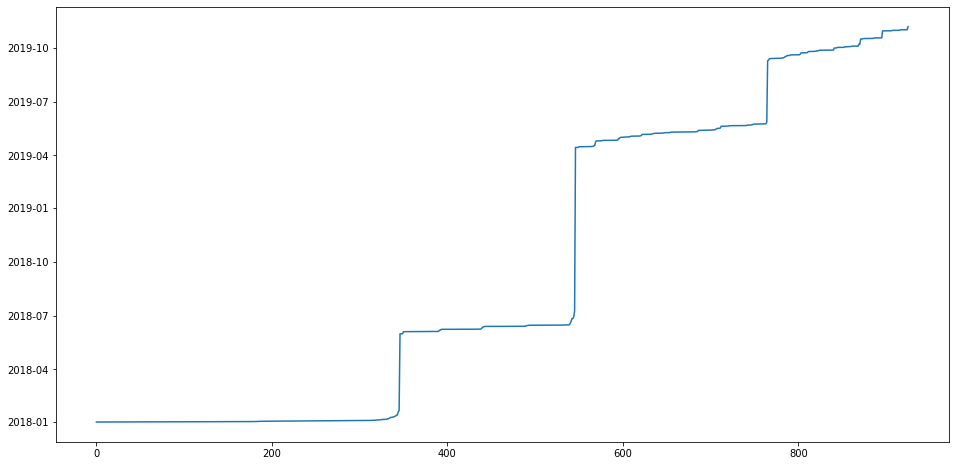

In [176]:
# When is the first tiem where all cars is available
CarID_dict = dict(iter(df.groupby('car')))

fc = pd.Series({car: min(sub_df['park_time']) for car, sub_df in CarID_dict.items()})
engine_dict = {car: sub_df['engine'].values[0] for car, sub_df in CarID_dict.items()}
    
plt.figure(figsize = (16,8))
plt.plot(fc.sort_values().values)
plt.show() # Det her skal un der preprocess

In [177]:
first_df = fc.sort_values().reset_index()
first_df.columns = ['car','time']
first_df['engine'] = first_df.car.map(engine_dict)
first_df.iloc[530:580]

,car,time,engine
530,WBA1R5108J5K58192,2018-06-15 11:31:19,118I
531,WBA1R5101J5K57918,2018-06-15 11:42:15,118I
532,WBA1R5107J5K57969,2018-06-15 12:12:16,118I
533,WMWXU7103KTM91317,2018-06-15 12:13:56,COOPER
534,WMWXU7106KTM91408,2018-06-15 12:28:03,COOPER
535,WMWXU7106KTM91411,2018-06-15 12:50:06,COOPER
536,WBA1R5103J7B13939,2018-06-15 13:03:01,118I
537,WMWXR3103KTK68690,2018-06-15 19:08:08,COOPER
538,WMWXU7101KTM91395,2018-06-15 21:28:11,COOPER
539,WBA1R5103J5K57967,2018-06-15 21:29:30,118I


In [178]:
df.engine.value_counts()

I3              792736
COOPER          306284
I3 120          291523
118I            267420
I3 94            24252
X1 SDRIVE18I     13951
X2 SDRIVE18I      4699
Name: engine, dtype: int64

In [179]:
df = df.assign(movedTF = (df.moved > 100).astype(int))
park_df = df.drop(columns = 'reservation_time')
park_df['action'] = 'Park'
park_df.rename(columns = {'park_time':'time'}, inplace = True)
reserve_df = df.drop(columns = 'park_time')
reserve_df['action'] = 'Reservation'
reserve_df.rename(columns = {'reservation_time':'time'}, inplace = True)
df_split = pd.concat([park_df,reserve_df]).sort_values(by = 'time')

In [180]:
df_split[['prev_customer', 'next_customer']] = (df_split[['prev_customer', 'next_customer']] == 'Customer').values

# Define action as T/F on park/reserve
df_split['action'] = (df_split['action'] == 'Park').values

In [181]:
# Fix types
df_split = df_split.astype({'time_to_reservation': 'float32', 'park_location_lat': 'float32', 'park_location_long': 'float32', 'leave_location_lat': 'float32', 'leave_location_long': 'float32', 'park_zone': 'int32', 'leave_zone': 'int32', 'park_fuel': 'int8', 'leave_fuel': 'int8', 'moved': 'float32', 'movedTF': 'bool'})

In [182]:
df_split.reset_index(drop = True, inplace = True)
df_split.to_csv('data/processed/VacancySplit.csv')

In [183]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401730 entries, 0 to 3401729
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   car                  object        
 1   time                 datetime64[ns]
 2   time_to_reservation  float32       
 3   park_location_lat    float32       
 4   park_location_long   float32       
 5   leave_location_lat   float32       
 6   leave_location_long  float32       
 7   park_zone            int32         
 8   leave_zone           int32         
 9   park_fuel            int8          
 10  leave_fuel           int8          
 11  engine               object        
 12  moved                float32       
 13  prev_customer        bool          
 14  next_customer        bool          
 15  movedTF              bool          
 16  action               bool          
dtypes: bool(4), datetime64[ns](1), float32(6), int32(2), int8(2), object(2)
memory usage: 201.1+ MB


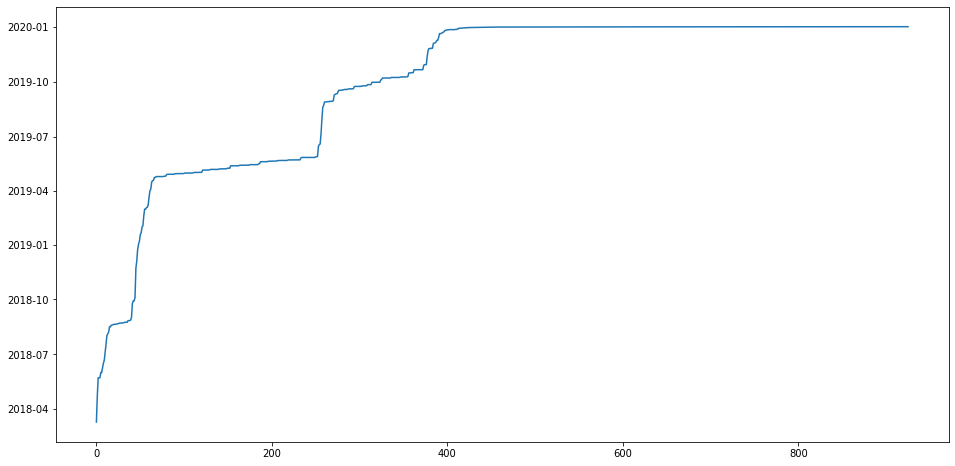

In [184]:
plt.figure(figsize = (16,8))
plt.plot(pd.Series({car: max(sub_df['reservation_time']) for car, sub_df in CarID_dict.items()}).sort_values().values)
plt.show() # Det her skal un der preprocess

## Tmp

In [185]:
CarID_dict = dict(iter(df_split.groupby('car')))

tmp = pd.Series({car: sum(dataf.action.astype(int).diff().values[1:] == 0) for car,dataf in CarID_dict.items()})

In [186]:
tmp.sort_values(ascending=False).iloc[:25]

WBY1Z21080V307941    2
WMWXR3108KTK54607    2
WBA1R5100J5K57439    0
WBY8P2104K7D71294    0
WBY8P2103K7D89902    0
WBY8P2103K7D91102    0
WBY8P2103K7D93223    0
WBY8P2103K7D95246    0
WBY8P2103K7D98468    0
WBY8P2103K7E09792    0
WBY8P2103K7E70771    0
WBY8P2103K7E70804    0
WBY8P2103K7E72617    0
WBY8P2103K7E74366    0
WBY8P2104K7D70324    0
WBY8P2104K7D72350    0
WBY8P2103K7D82416    0
WBY8P2104K7D73420    0
WBY8P2104K7D73434    0
WBY8P2104K7D73451    0
WBY8P2104K7D73563    0
WBY8P2104K7D73577    0
WBY8P2104K7D75684    0
WBY8P2104K7D80299    0
WBY8P2104K7D82375    0
dtype: int64

In [193]:
np.where(CarID_dict['WBY1Z21080V307941'].action.astype(int).diff().values[1:] == 0)

(array([2843, 2845]),)

In [194]:
CarID_dict['WBY1Z21080V307941'].iloc[2840:2850]

,car,time,time_to_reservation,park_location_lat,park_location_long,leave_location_lat,leave_location_long,park_zone,leave_zone,park_fuel,leave_fuel,engine,moved,prev_customer,next_customer,movedTF,action
1284114,WBY1Z21080V307941,2018-12-01 01:20:38,100.690002,55.723160,12.441445,55.654110,12.539821,163013,102852,0,100,I3,9847.239258,True,False,True,True
1305494,WBY1Z21080V307941,2018-12-05 06:02:02,100.690002,55.723160,12.441445,55.654110,12.539821,163013,102852,0,100,I3,9847.239258,True,False,True,False
1305867,WBY1Z21080V307941,2018-12-05 07:59:33,0.161111,55.652454,12.546366,55.652454,12.546366,102851,102851,88,88,I3,0.000000,False,True,False,True
1305926,WBY1Z21080V307941,2018-12-05 08:09:13,0.161111,55.652454,12.546366,55.652454,12.546366,102851,102851,88,88,I3,0.000000,False,True,False,False
1306052,WBY1Z21080V307941,2018-12-05 08:30:48,-0.045833,55.681095,12.562269,55.652454,12.546366,102152,102851,44,44,I3,3336.931152,True,True,True,False
1306070,WBY1Z21080V307941,2018-12-05 08:33:33,-0.045833,55.681095,12.562269,55.652454,12.546366,102152,102851,44,44,I3,3336.931152,True,True,True,True
1306467,WBY1Z21080V307941,2018-12-05 09:51:48,0.923056,55.652454,12.546366,55.681095,12.562269,102851,102152,0,77,I3,3336.931152,True,True,True,True
1306662,WBY1Z21080V307941,2018-12-05 10:47:11,0.923056,55.652454,12.546366,55.681095,12.562269,102851,102152,0,77,I3,3336.931152,True,True,True,False
1306820,WBY1Z21080V307941,2018-12-05 11:36:44,3.369444,55.657131,12.596790,55.657131,12.596790,103244,103244,62,62,I3,0.000000,True,True,False,True
1307605,WBY1Z21080V307941,2018-12-05 14:58:54,3.369444,55.657131,12.596790,55.657131,12.596790,103244,103244,62,62,I3,0.000000,True,True,False,False


In [191]:
CarID_dict['WMWXR3108KTK54607'].iloc[2215:2225]

,car,time,time_to_reservation,park_location_lat,park_location_long,leave_location_lat,leave_location_long,park_zone,leave_zone,park_fuel,leave_fuel,engine,moved,prev_customer,next_customer,movedTF,action
1556230,WMWXR3108KTK54607,2019-01-23 18:44:51,0.147500,55.653217,12.623379,55.653217,12.623379,103221,103221,79,79,COOPER,0.000000,True,True,False,False
1560055,WMWXR3108KTK54607,2019-01-24 14:50:05,0.625000,55.716480,12.554003,55.716480,12.554003,102513,102513,46,48,COOPER,0.000000,True,True,False,True
1560258,WMWXR3108KTK54607,2019-01-24 15:27:35,0.625000,55.716480,12.554003,55.716480,12.554003,102513,102513,46,48,COOPER,0.000000,True,True,False,False
1560453,WMWXR3108KTK54607,2019-01-24 16:03:39,0.026389,55.650753,12.621074,55.650753,12.621074,103231,103231,44,44,COOPER,0.000000,True,True,False,True
1560460,WMWXR3108KTK54607,2019-01-24 16:05:14,0.026389,55.650753,12.621074,55.650753,12.621074,103231,103231,44,44,COOPER,0.000000,True,True,False,False
1560599,WMWXR3108KTK54607,2019-01-24 16:32:08,-0.314167,55.733326,12.440219,55.731152,12.443104,163021,163021,22,22,COOPER,301.678741,True,True,True,False
1560615,WMWXR3108KTK54607,2019-01-24 16:34:23,0.289167,55.709492,12.473623,55.733326,12.440219,102662,163021,0,41,COOPER,3376.575684,True,False,True,True
1560717,WMWXR3108KTK54607,2019-01-24 16:50:59,-0.314167,55.733326,12.440219,55.731152,12.443104,163021,163021,22,22,COOPER,301.678741,True,True,True,True
1560723,WMWXR3108KTK54607,2019-01-24 16:51:44,0.289167,55.709492,12.473623,55.733326,12.440219,102662,163021,0,41,COOPER,3376.575684,True,False,True,False
1560909,WMWXR3108KTK54607,2019-01-24 17:19:25,2.419445,55.709492,12.473623,55.709492,12.473623,102662,102662,39,41,COOPER,0.000000,False,True,False,True


In [195]:
df = pd.read_csv('data/processed/Full_data_set.csv', index_col=0, parse_dates=[7,8,9])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701792 entries, 2062415 to 1457863
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Customer_Group       object        
 1   CustomerID           int64         
 2   CarID                object        
 3   Engine               object        
 4   Rental_flag          object        
 5   RentalID             int64         
 6   Rental_Usage_Type    object        
 7   Reservation_Time     datetime64[ns]
 8   End_Time             datetime64[ns]
 9   Revenue              float64       
 10  Distance             int64         
 11  Reservation_Minutes  int64         
 12  Fuel_Start           int64         
 13  Fuel_End             int64         
 14  Start_Lat            float64       
 15  Start_Long           float64       
 16  End_Lat              float64       
 17  End_Long             float64       
 18  TripDist             float64       
 19  Start_Zone     

In [207]:
df[df.CarID == 'WBY1Z21080V307941'].iloc[1420:1450]

,Customer_Group,CustomerID,CarID,Engine,Rental_flag,RentalID,Rental_Usage_Type,Reservation_Time,End_Time,Revenue,...,Reservation_Minutes,Fuel_Start,Fuel_End,Start_Lat,Start_Long,End_Lat,End_Long,TripDist,Start_Zone,End_Zone
2457748,Customer,3067577,WBY1Z21080V307941,I3,No,9389835068,Private,2018-11-30 23:38:23,2018-12-01 01:20:38,240.0,...,18,46,0,55.732381,12.441417,55.723158,12.441445,1025.552307,163021,163013
2469545,Non_Customer,793639,WBY1Z21080V307941,I3,No,9390074434,Private,2018-12-05 06:02:02,2018-12-05 07:59:33,0.0,...,81,100,88,55.654111,12.539821,55.652456,12.546366,449.961084,102852,102851
2469688,Customer,2616133,WBY1Z21080V307941,I3,No,9390077413,Private,2018-12-05 08:09:13,2018-12-05 08:33:33,45.6,...,6,88,44,55.652456,12.546366,55.681094,12.562269,3336.931136,102851,102152
2470015,Customer,2754152,WBY1Z21080V307941,I3,No,9390085337,Private,2018-12-05 08:30:48,2018-12-05 09:51:48,64.8,...,81,44,0,55.652456,12.546366,55.652456,12.546366,0.000000,102851,102851
2470096,Customer,3002441,WBY1Z21080V307941,I3,No,9390088472,Private,2018-12-05 10:47:11,2018-12-05 11:36:44,54.4,...,12,77,62,55.681094,12.562269,55.657131,12.596790,3433.136070,102152,103244
2470658,Customer,2185579,WBY1Z21080V307941,I3,No,9390101606,Private,2018-12-05 14:58:54,2018-12-05 15:43:35,108.8,...,11,62,43,55.657131,12.596790,55.700701,12.577444,4994.281680,103244,102342
2470805,Customer,801504,WBY1Z21080V307941,I3,No,9390105008,Private,2018-12-05 16:03:16,2018-12-05 17:13:20,109.2,...,7,43,18,55.700701,12.577444,55.644189,12.502657,7840.828976,102342,102753
2472142,Non_Customer,793639,WBY1Z21080V307941,I3,No,9390131768,Private,2018-12-05 22:16:16,2018-12-06 05:56:01,0.0,...,443,13,75,55.644189,12.502657,55.647516,12.526318,1530.077468,102753,102863
2472951,Customer,3002051,WBY1Z21080V307941,I3,No,9390152954,Private,2018-12-06 12:14:25,2018-12-06 12:46:37,62.4,...,7,77,59,55.647516,12.526318,55.654741,12.612000,5435.351927,102863,103224
2473140,Customer,3104629,WBY1Z21080V307941,I3,No,9390157220,Private,2018-12-06 13:34:28,2018-12-06 14:00:21,57.6,...,8,59,48,55.654741,12.612000,55.632408,12.575934,3359.901978,103224,103291
